# Simulator Client

This version uses the end-to-end simulator library rather than doing work itself.

In [1]:
import cupy as cp
import viz_cuda
import simulation

mempool = cp.get_default_memory_pool()
mempool.free_all_blocks()
print(f"mempool.used_bytes {mempool.used_bytes()}")

mempool.used_bytes 0


/home/joel/.local/lib/python3.8/site-packages/cupyx/jit/_interface.py:161: FutureWarning: cupyx.jit.rawkernel is experimental. The interface can change in the future.
  cupy._util.experimental('cupyx.jit.rawkernel')


In [2]:
%%time
results = simulation.SimulationResult()
simulator = simulation.Simulator(results, waves = 1, bundles = 30000000, bundle_size = 1)

CPU times: user 88 µs, sys: 16 µs, total: 104 µs
Wall time: 107 µs


In [3]:
%%time
#simulator.run()
simulator.run_all_waves()

[555 555 555 ... 555 555 555]
10000000.0
[555 555 555 ... 555 555 555]
10000000.0
photon batch energy joules: 0.0001073754517379301
photon batch power watts: 0.10737545173793009
emitter area m^2: 1.0000001111620804e-06
batch radiosity w/m^2: 107375.43980185282
[0.00613592 0.01840777 0.03067962 0.04295146 0.05522331 0.06749515
 0.079767   0.09203885 0.10431069 0.11658254 0.12885439 0.14112623
 0.15339808 0.16566993 0.17794177 0.19021362 0.20248546 0.21475731
 0.22702916 0.239301   0.25157285 0.2638447  0.27611654 0.28838839
 0.30066023 0.31293208 0.32520393 0.33747577 0.34974762 0.36201947
 0.37429131 0.38656316 0.398835   0.41110685 0.4233787  0.43565054
 0.44792239 0.46019424 0.47246608 0.48473793 0.49700978 0.50928162
 0.52155347 0.53382531 0.54609716 0.55836901 0.57064085 0.5829127
 0.59518455 0.60745639 0.61972824 0.63200008 0.64427193 0.65654378
 0.66881562 0.68108747 0.69335932 0.70563116 0.71790301 0.73017486
 0.7424467  0.75471855 0.76699039 0.77926224 0.79153409 0.80380593
 0.

[0.01227185 0.03681554 0.06135923 0.08590292 0.11044662 0.13499031
 0.159534   0.18407769 0.20862139 0.23316508 0.25770877 0.28225246
 0.30679616 0.33133985 0.35588354 0.38042724 0.40497093 0.42951462
 0.45405831 0.47860201 0.5031457  0.52768939 0.55223308 0.57677678
 0.60132047 0.62586416 0.65040785 0.67495155 0.69949524 0.72403893
 0.74858262 0.77312632 0.79767001 0.8222137  0.84675739 0.87130109
 0.89584478 0.92038847 0.94493217 0.96947586 0.99401955 1.01856324
 1.04310694 1.06765063 1.09219432 1.11673801 1.14128171 1.1658254
 1.19036909 1.21491278 1.23945648 1.26400017 1.28854386 1.31308755
 1.33763125 1.36217494 1.38671863 1.41126232 1.43580602 1.46034971
 1.4848934  1.5094371  1.53398079 1.55852448 1.58306817 1.60761187
 1.63215556 1.65669925 1.68124294 1.70578664 1.73033033 1.75487402
 1.77941771 1.80396141 1.8285051  1.85304879 1.87759248 1.90213618
 1.92667987 1.95122356 1.97576725 2.00031095 2.02485464 2.04939833
 2.07394203 2.09848572 2.12302941 2.1475731  2.1721168  2.19666

LED emitted photons: 30000000


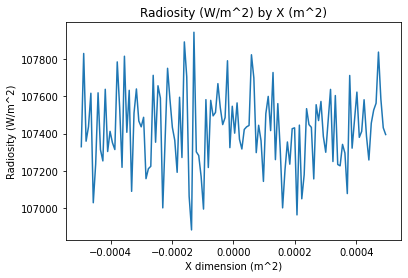

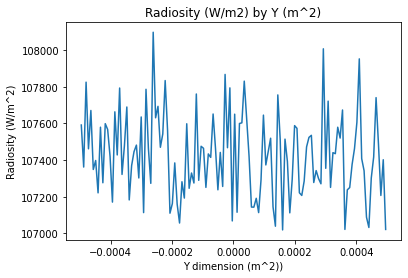

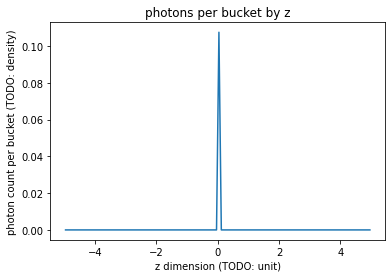

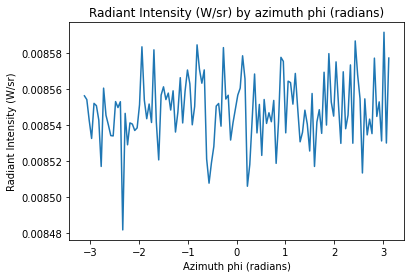

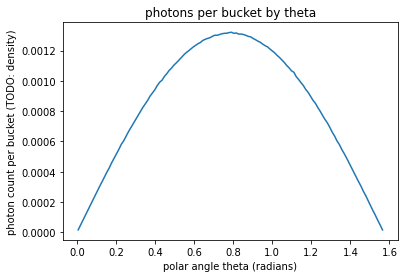

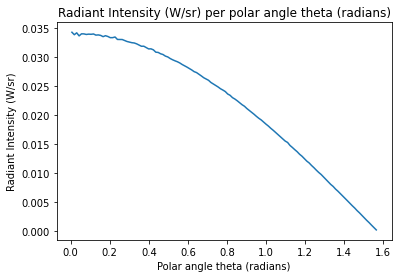

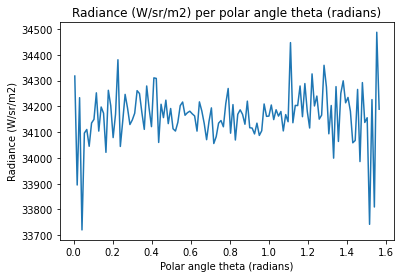

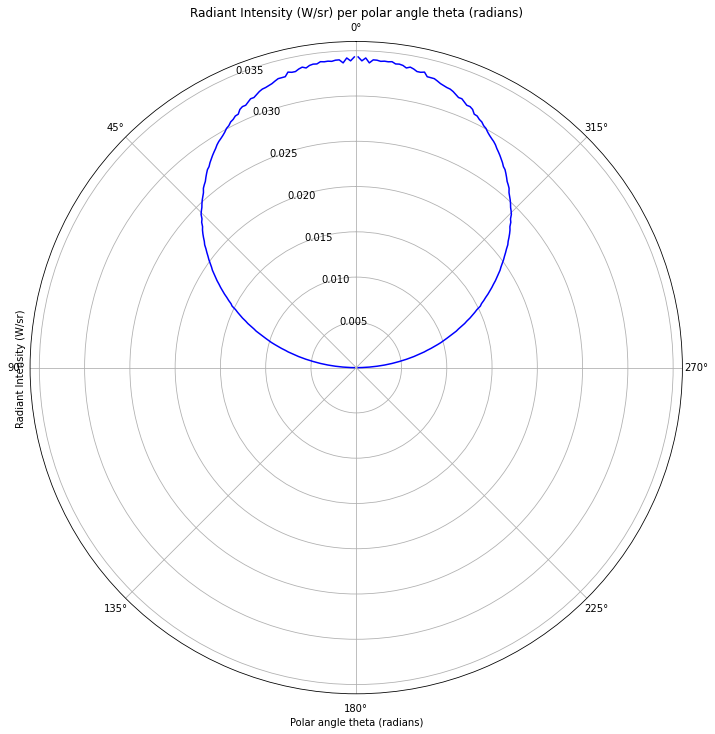

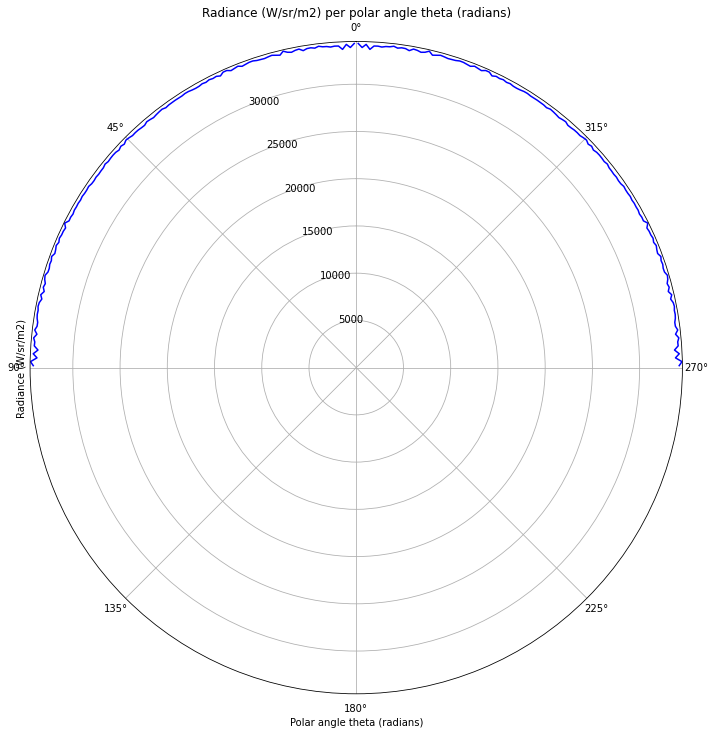

Output()

In [4]:
print(f"LED emitted photons: {results._source_stage._photons_size}")
viz_cuda.plot_all_histograms(results._source_stage)
viz_cuda.plot_stage_3d(results._source_stage)

diffuser incident photons: 25348304


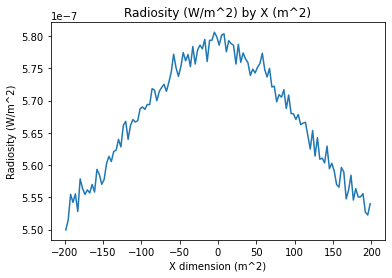

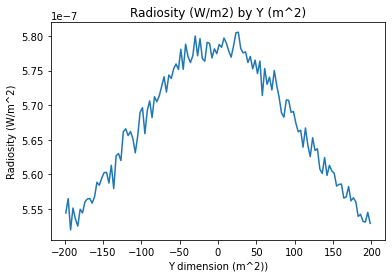

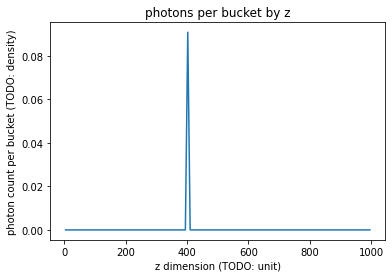

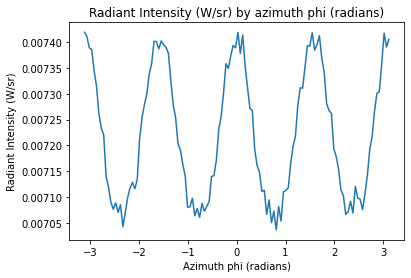

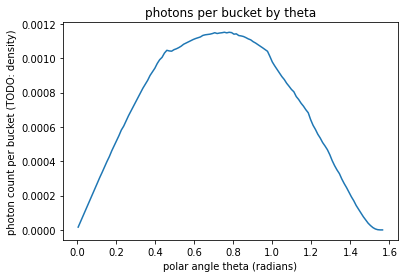

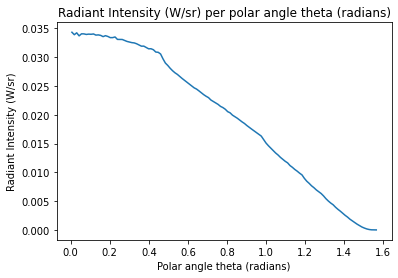

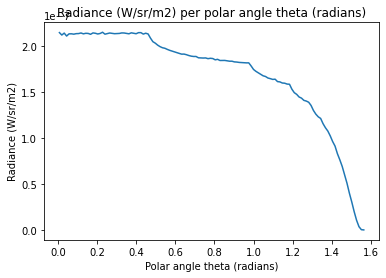

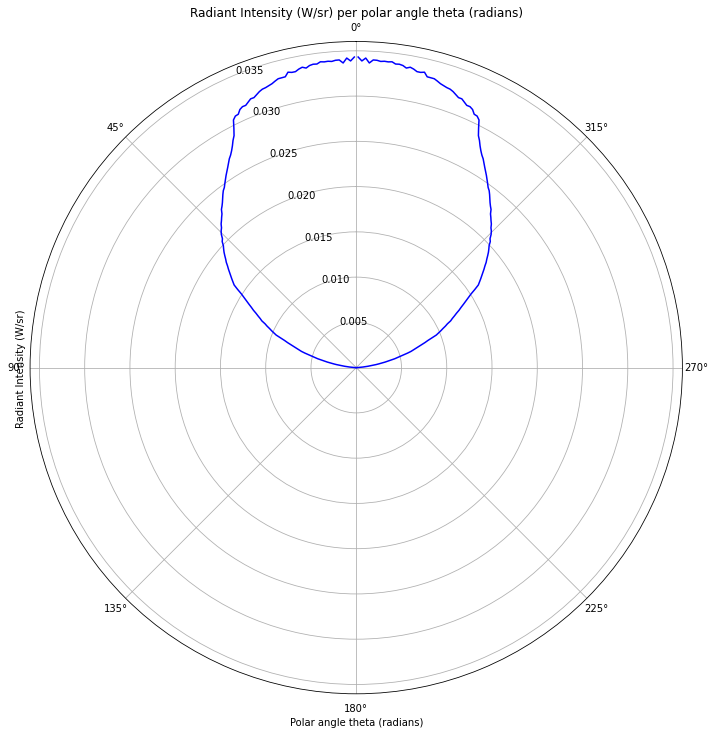

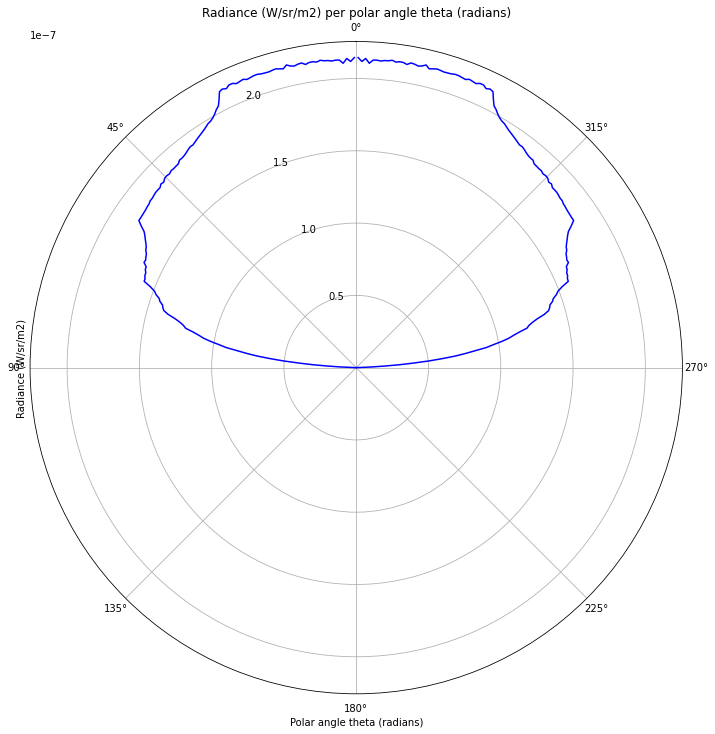

Output()

In [5]:
print(f"diffuser incident photons: {results._box_stage._photons_size}")
viz_cuda.plot_all_histograms(results._box_stage)
viz_cuda.plot_stage_3d(results._box_stage)

diffuser scattered photons: 21293497


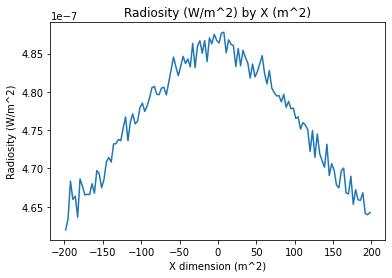

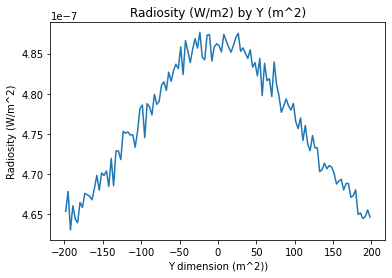

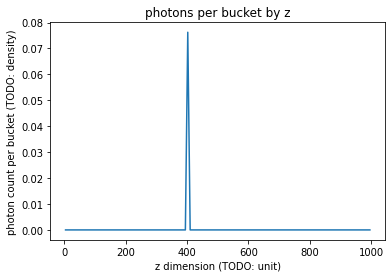

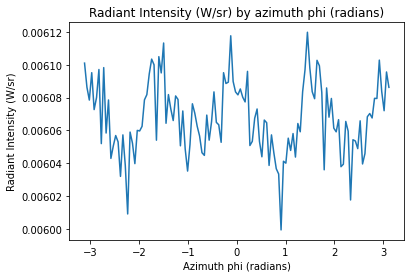

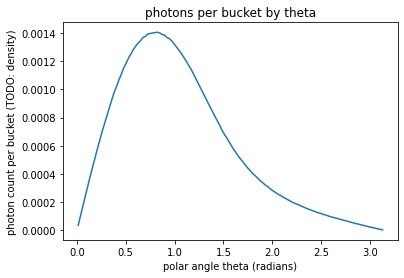

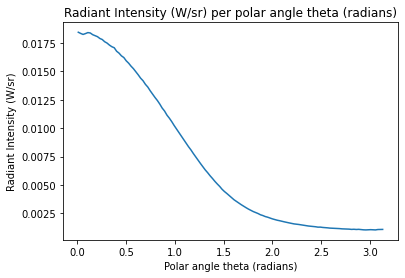

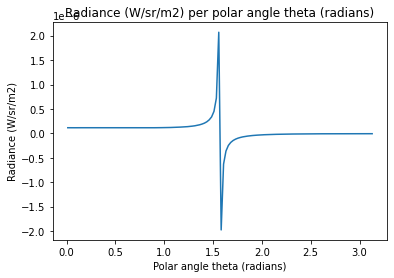

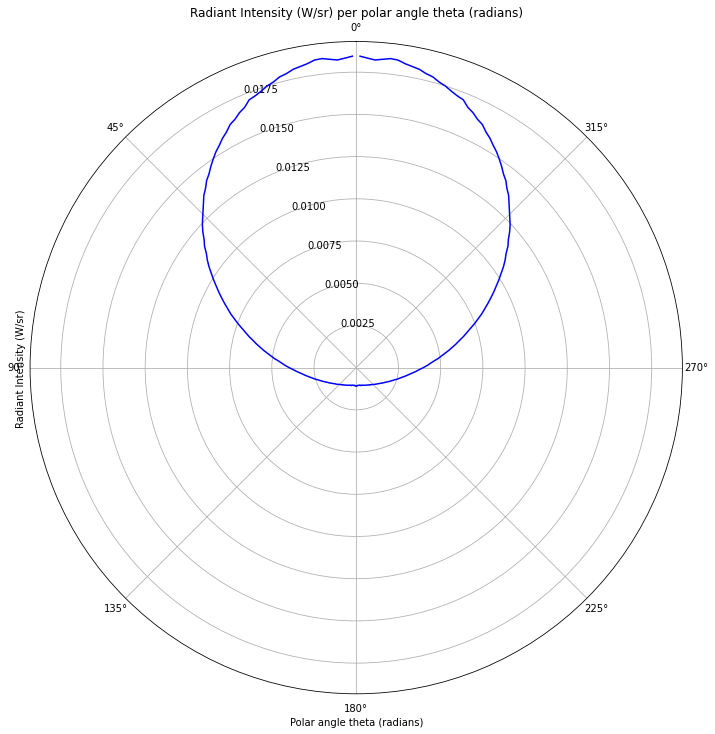

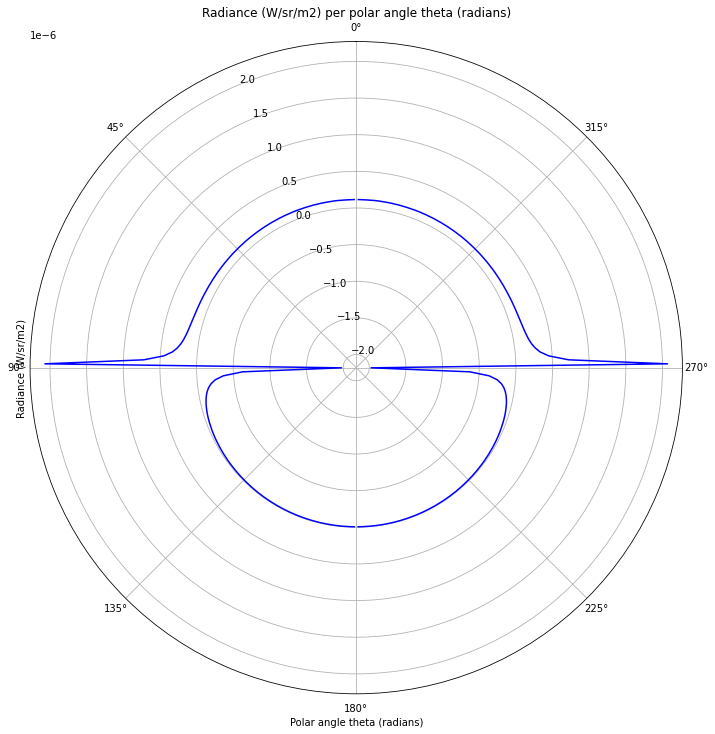

Output()

In [6]:
print(f"diffuser scattered photons: {results._diffuser_stage._photons_size}")
viz_cuda.plot_all_histograms(results._diffuser_stage)
viz_cuda.plot_stage_3d(results._diffuser_stage)

reflector indicent photons: 2060


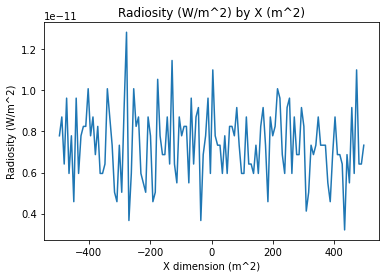

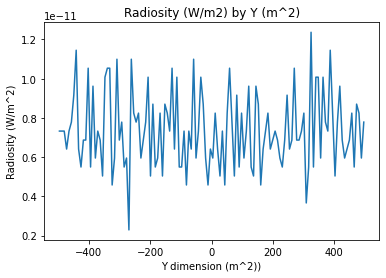

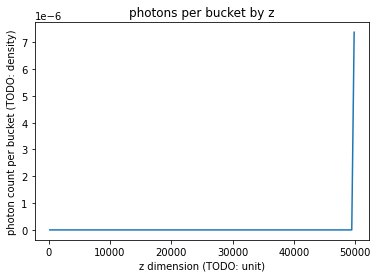

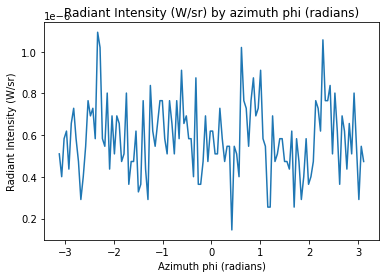

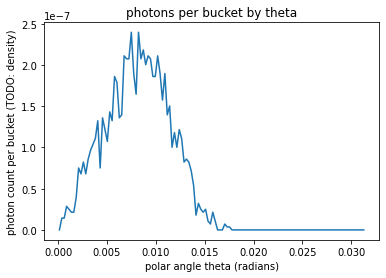

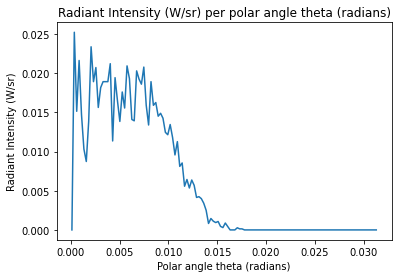

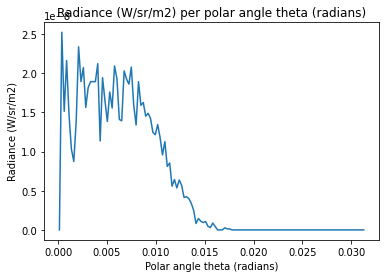

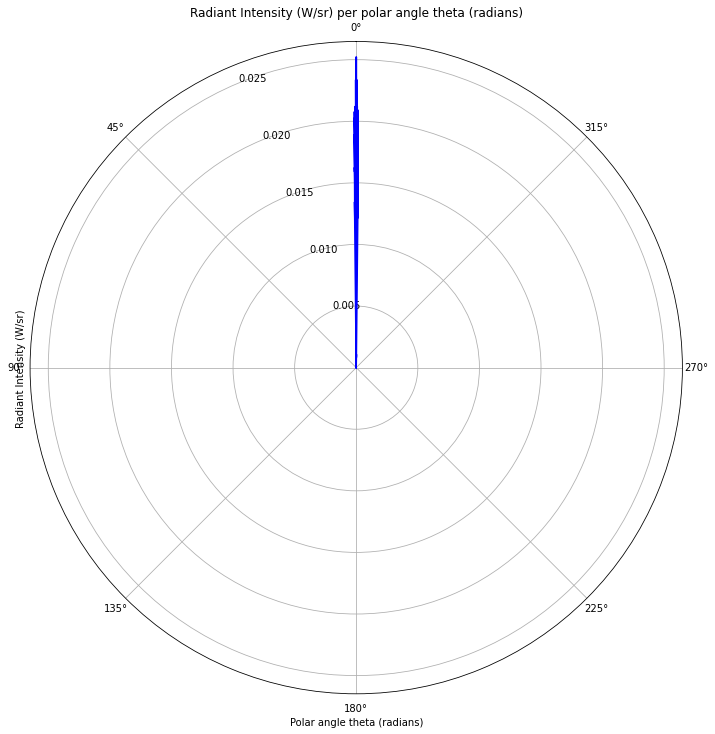

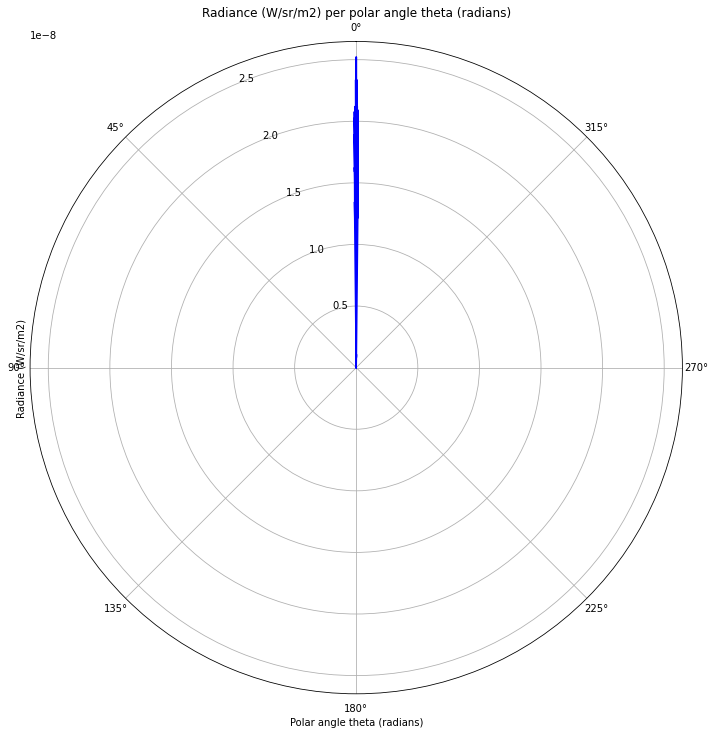

Output()

In [7]:
print(f"reflector indicent photons: {results._outbound_stage._photons_size}")
viz_cuda.plot_all_histograms(results._outbound_stage)
viz_cuda.plot_stage_3d(results._outbound_stage)

reflected photons: 2060


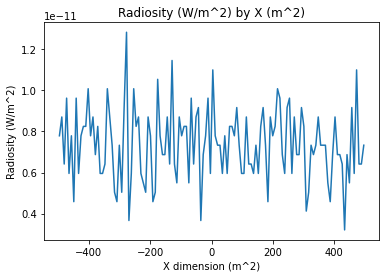

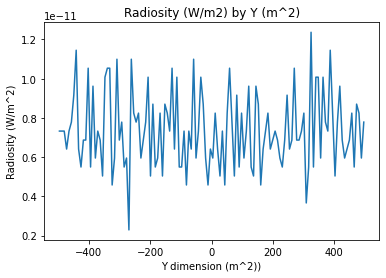

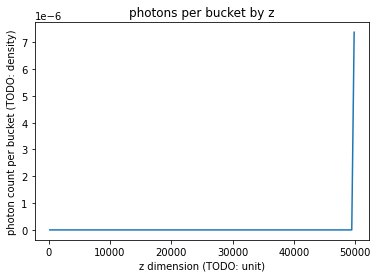

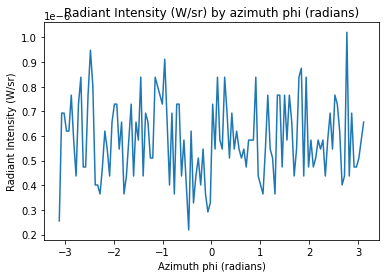

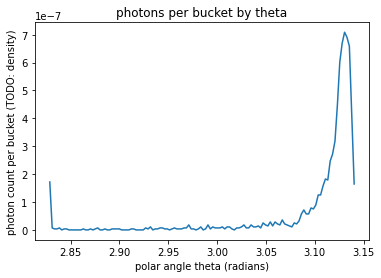

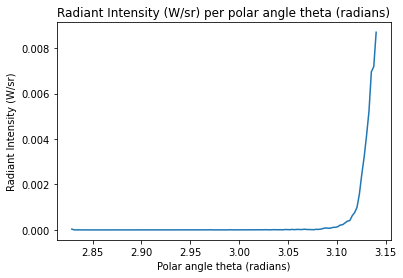

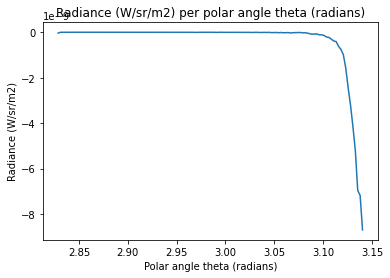

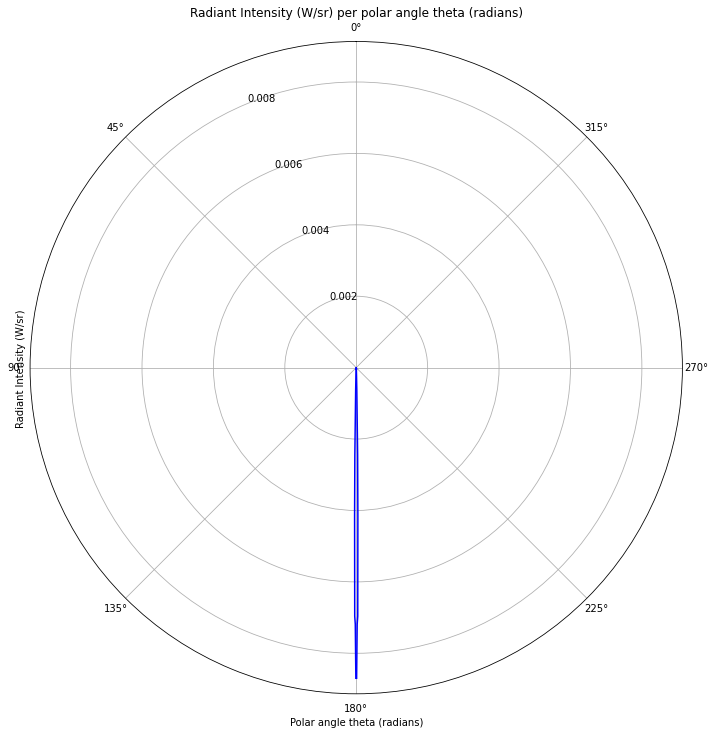

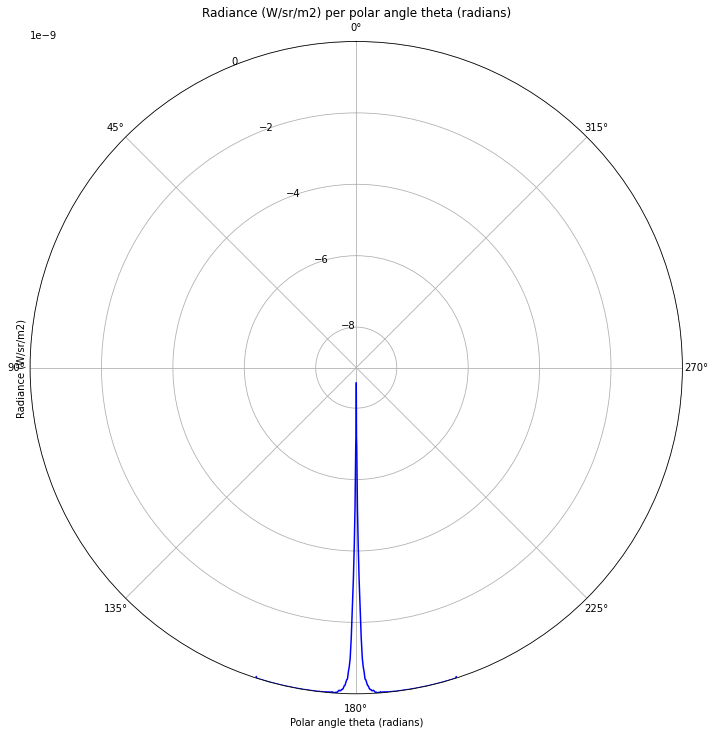

Output()

In [8]:
print(f"reflected photons: {results._inbound_stage._photons_size}")
viz_cuda.plot_all_histograms(results._inbound_stage)
viz_cuda.plot_stage_3d(results._inbound_stage)

camera plane photons: 1391


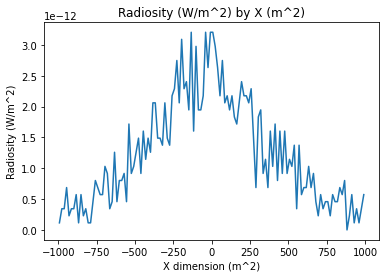

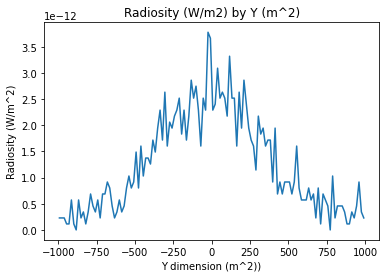

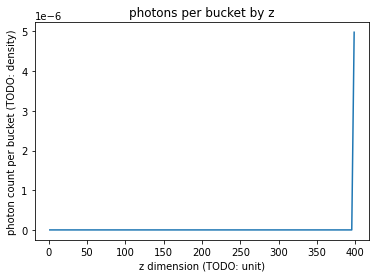

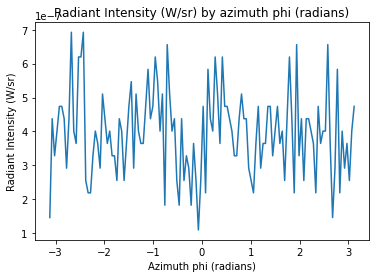

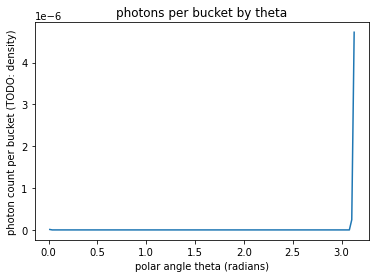

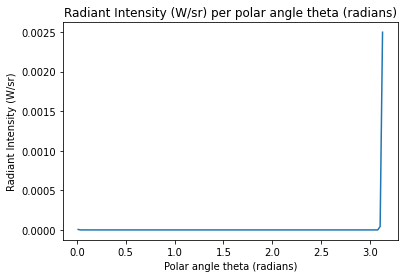

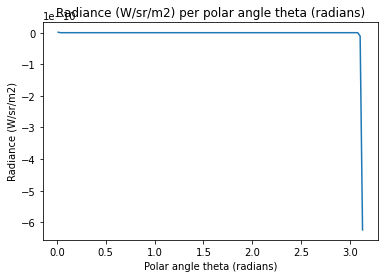

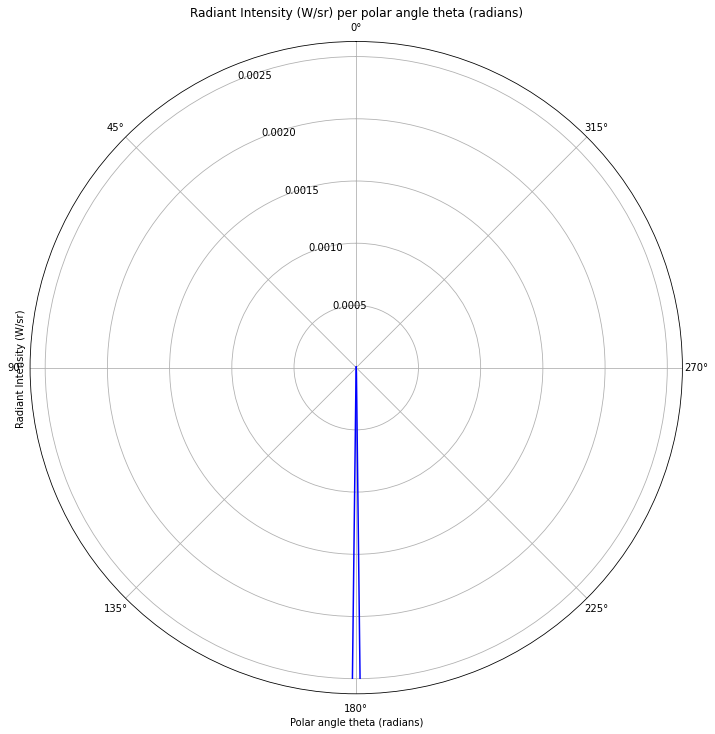

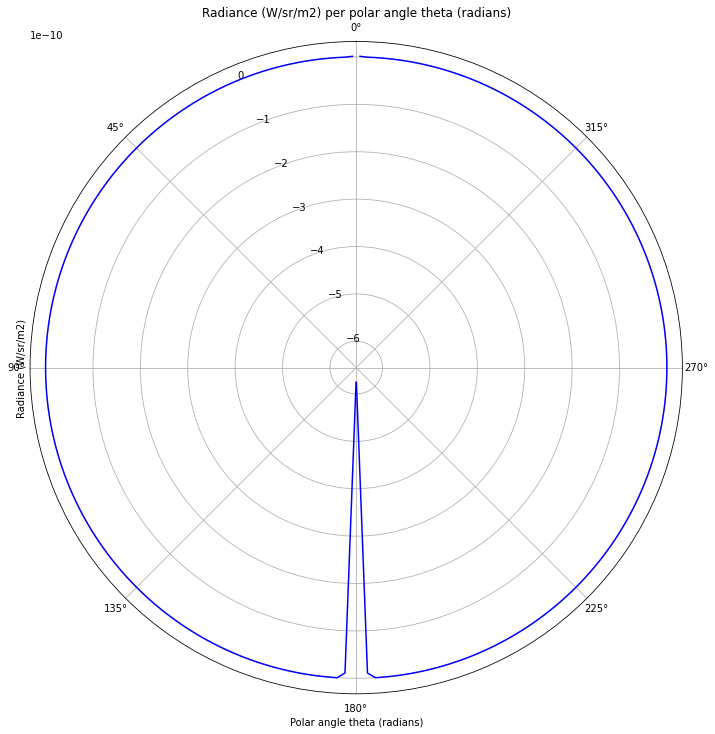

Output()

In [9]:
print(f"camera plane photons: {results._camera_plane_stage._photons_size}")
viz_cuda.plot_all_histograms(results._camera_plane_stage)
viz_cuda.plot_stage_3d(results._camera_plane_stage)